This plots ROI values extracted from images that have been normalized using DARTEL, 
but the values have been extracted from ROI derived from a prior analysis done using images normalized using DARTEL.

In [11]:
%run /home/grg/git/alfa/nilearn-helper.py
%matplotlib inline
%run /home/grg/git/alfa/roicollect.py

This collect the values from \*\_stats.csv files, i.e. values that have been extracted from ROI manually drawn in MNI space.
The bad thing with this is that the ROI is defined in a reference space. This is subject to individual registration errors.

using default groups
Standard deviation of label Superior longitudinal fasciculus (temporal part) L: 0.0457153773632
Model used for correction: roi ~ 1 + gender + age
Standard deviation after correction for covariates: 0.0453427397548
Region: Superior longitudinal fasciculus (temporal part) L
0.0284838007718
0.138673909156
0.19690508869
Standard deviation of label Superior longitudinal fasciculus (temporal part) R: 0.039124411455
Model used for correction: roi ~ 1 + gender + age
Standard deviation after correction for covariates: 0.0390539051572
Region: Superior longitudinal fasciculus (temporal part) R
0.000377928442824
0.00854935692395
0.0658202281732


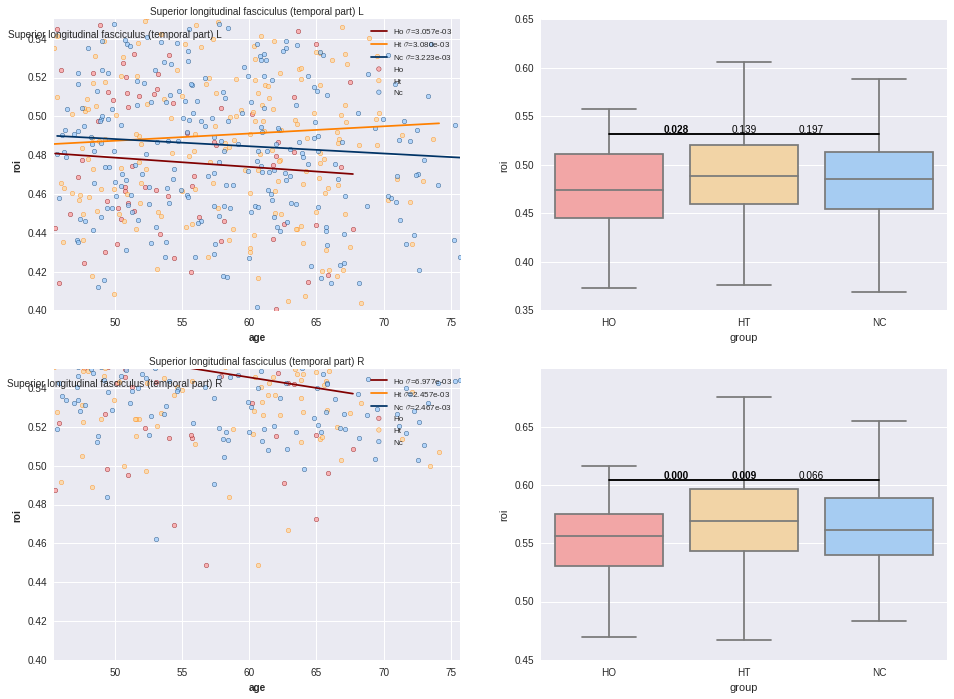

In [17]:
regions = range(19, 21)
#for x in [9]: #,10,11,12,13]:
#    regions.remove(x)
names = {1: 'Anterior thalamic radiation L',
 2: 'Anterior thalamic radiation R',
 3: 'Corticospinal tract L',
 4: 'Corticospinal tract R',
 5: 'Cingulum (cingulate gyrus) L',
 6: 'Cingulum (cingulate gyrus) R',
 7: 'Cingulum (hippocampus) L',
 8: 'Cingulum (hippocampus) R',
 9: 'Forceps major',
 10: 'Forceps minor',
 11: 'Inferior fronto-occipital fasciculus L',
 12: 'Inferior fronto-occipital fasciculus R',
 13: 'Inferior longitudinal fasciculus L',
 14: 'Inferior longitudinal fasciculus R',
 15: 'Superior longitudinal fasciculus L',
 16: 'Superior longitudinal fasciculus R',
 17: 'Uncinate fasciculus L',
 18: 'Uncinate fasciculus R',
 19: 'Superior longitudinal fasciculus (temporal part) L',
 20: 'Superior longitudinal fasciculus (temporal part) R'}

data = pd.read_excel('/tmp/covariates.xlsx')
data = data.set_index(data['subject'])
data = data.sort_values(['apo', 'subject'])
src = '/home/grg/tbss_bsc_subjects/roivalues_tracts_tbss_FA_skel/'
filepattern = '*_stats.csv'
csvfiles = glob(osp.join(src, filepattern))
subjects = [string.atoi(e.split('/')[-1].split('_')[0]) for e in csvfiles]

#import json
#j = json.load(open('/home/grg/spm/data/matched_groups.json'))
#subjects = []
#for each in j:
#    subjects.extend(each)
#csvfiles = []
#for s in subjects:
#    csvfp = glob(osp.join(src, '%s%s'%(s, filepattern)))[0]
#    csvfiles.append(csvfp)


values = collect_roivalues(3, csvfiles=csvfiles, subjects=subjects)

#data.join(values)
#poly = ols(formula='roi ~ 1 + age', data=data.join(values)).fit()
plot_regions(data, regions, csvfiles, subjects,  names=names,ylim=[0.4,0.55])

In [40]:
len(subjects)

304